## Project Overview
The objective of this project is to build a machine learning model capable of predicting car prices based on key vehicle attributes such as mileage, engine size, fuel type, transmission, and year of manufacture.

This project follows a complete data science workflow including data cleaning, exploratory data analysis (EDA), feature engineering, model training, and evaluation. The goal is to build an accurate model that predicts the price of a used car based on its specification and to also understand the factors that influence car prices.

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sn
import matplotlib.pyplot as plt

## Data Loading, Understanding and Inspection
At this stage, the dataset is loaded and inspected to understand its structure, feature types, and overall size. This helps identify potential data quality issues such as missing values, incorrect data types, or irrelevant columns.
The dataset contains a list of second hand cars with their respective price, type of body, engine type, engine volume, engine type year of registration and model.

In [2]:
raw_data = pd.read_csv("Real life example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Initial Observations
From the dataset overview, we notice that each variable has different number of observations, implying that there are missing values. We can also observe the mix of numerical and categorical variables. The target variable is the car selling price, which is continuous, while the potential regressors are brand, mileage, engine volume, engine type and year of production, making this a regression problem.

## Data Cleaning and Preprocessing
Before modeling, the dataset was cleaned to improve data quality and model performance. This involved removing variables that are of no interest to the model, handling missing values, correcting data types, and encoding categorical variables where necessary.

These steps ensure that the dataset is suitable for machine learning algorithms and reduces the risk of biased or inaccurate predictions.

#### Removing variable not needed

In [6]:
#The Model column was removed because it is not needed for this prediction
data = raw_data.drop(['Model'], axis=1)

#The rest of the dataset is checked to see what is left
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Dealing with missing values

In [21]:
# Checking for missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

#### The above shows that the price and engine volume column contains 172 and 150 missing values respectively. These values are then removed since they are less than 5% of all observations

In [9]:
#Removing records with null values
data_no_mv = data.dropna(axis=0)

#Checking to see what is left in the data
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring the Probability Density Functions (PDFs)
Understanding the distribution of numerical features is essential for identifying skewness, extreme values, and potential outliers that could negatively impact model performance.

In this section, Probability Density Function (PDF) plots are used to visualize how values of key numerical features are distributed across the dataset. This helps in assessing whether the data follows a normal distribution or is skewed, and whether extreme values are present.

## Price PDF

C:\Users\user\AppData\Local\Temp\ipykernel_13288\216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

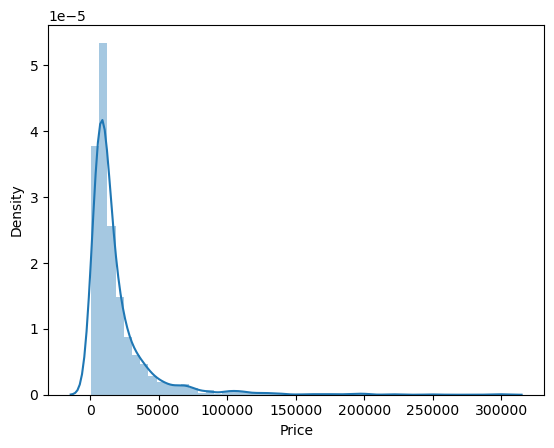

In [12]:
sns.distplot(data_no_mv['Price'])

#### Outlier detection in Price Distribution

Outliers are extreme values that differ significantly from the majority of observations. 

The selling price looks more like an exponential distribution and is right-skewed, suggesting that while most cars fall within a moderate price range, a small number of cars are priced significantly higher. These extreme values may represent luxury or premium vehicles and can affect the stability of regression models dramatically or reduce predictive accuracy by causing co-efficiencts to be inflated as the regression will try to place the line close to these values. So I dealt with these outliers by removing the top one percent of the obersavtions using the quantile method

In [13]:
# Get the 99th percentile value
q = data_no_mv['Price'].quantile(0.99)
q

129812.51999999981

In [14]:
#Creating a new dataframe with entries of price that are lower than the 99 percentile value
data_1 = data_no_mv[data_no_mv['Price']<q]

#Checking the new descriptives
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


## Outlier Detection Using the 99th Percentile

Outliers in the price variable were identified using a percentile-based approach. The 99th percentile of car prices was calculated, and all observations with prices above this threshold were considered extreme values.
By removing values above the 99th percentile, the dataset becomes more representative of typical car prices, leading to more stable and reliable model performance.

### Effect of Outlier Removal

After removing outliers, the distributions of the price variable  became more compact and less skewed. This indicates a reduction in extreme values, allowing the models to learn patterns more effectively without being influenced by noise.

The maximum value of the price after removing the outliers is now around 130000 dollars. While this value is still far away from the mean, it is acceptably closer

## Mileage PDF

C:\Users\user\AppData\Local\Temp\ipykernel_13288\534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

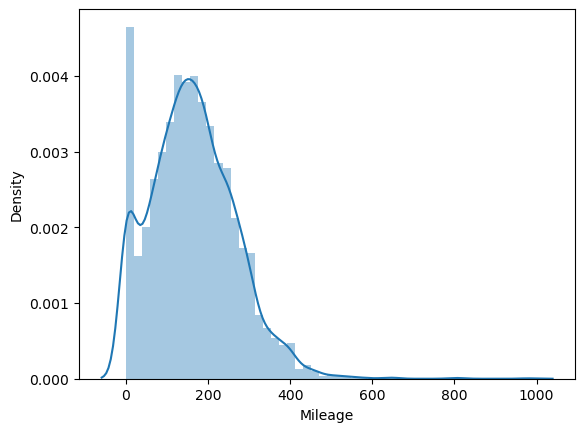

In [16]:
sns.distplot(data_no_mv['Mileage'])

#### The PDF plot shows that mileage values are also right-skewed, with a large concentration of cars having lower mileage and a long tail of higher mileage values. This indicates the presence of extreme values that could disproportionately influence model training if not handled properly. These outliers are also dealt with by removing the top one percent of the obersavtions


In [18]:
# Keeping the data lower than the 99th percentile
q=data_1['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q]
data_2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


C:\Users\user\AppData\Local\Temp\ipykernel_13288\4271311782.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

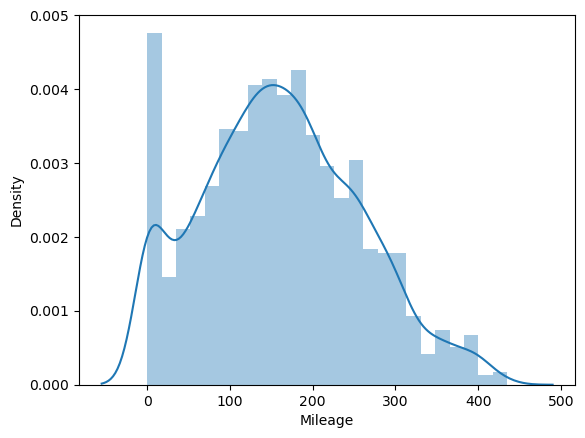

In [19]:
# Checking the Mileage distribution after removing the outliers
sns.distplot(data_2['Mileage'])

## Engine Volume PDF

C:\Users\user\AppData\Local\Temp\ipykernel_13288\442446691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv["EngineV"])


<Axes: xlabel='EngineV', ylabel='Density'>

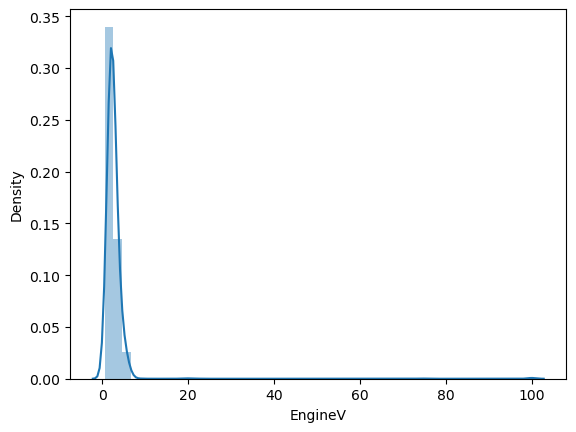

In [20]:
sns.distplot(data_no_mv["EngineV"])

#### In general, normal Engine volume should fall between 0.6 and 6.5 according to governmental regulation, So all values that are lower than the benchamrk of 6.5 will only be kept

C:\Users\user\AppData\Local\Temp\ipykernel_13288\1028992260.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3["EngineV"])


<Axes: xlabel='EngineV', ylabel='Density'>

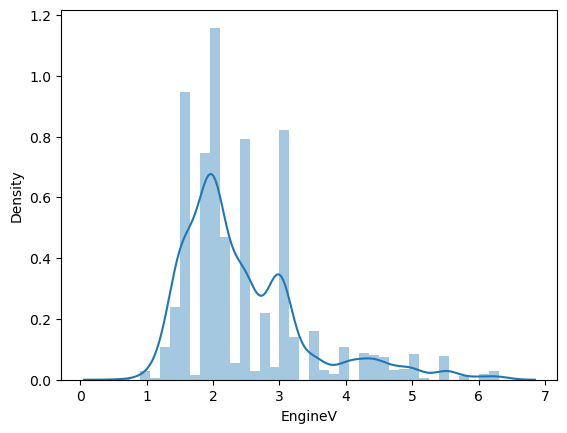

In [23]:
data_3 = data_2[data_2["EngineV"]<6.5]
sns.distplot(data_3["EngineV"])

## Year PDF

C:\Users\user\AppData\Local\Temp\ipykernel_13288\2968087591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv["Year"])


<Axes: xlabel='Year', ylabel='Density'>

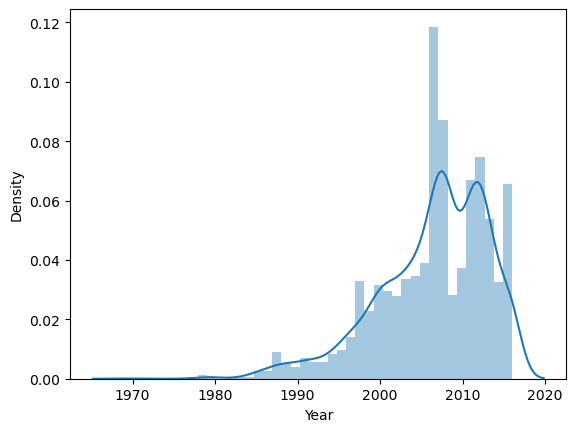

In [24]:
sns.distplot(data_no_mv["Year"])

## Distribution of Manufacturing Year

The probability density plot shows that the distribution of car manufacturing years is not uniform. Most vehicles in the dataset are concentrated between the mid-2000s and mid-2010s, indicating that newer cars are more common in the data.

There are relatively fewer cars manufactured before the early 1990s, which suggests that older vehicles are underrepresented. This skew toward newer cars reflects typical market behavior, as newer vehicles are more frequently listed and sold.

C:\Users\user\AppData\Local\Temp\ipykernel_13288\1608123731.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4["Year"])


<Axes: xlabel='Year', ylabel='Density'>

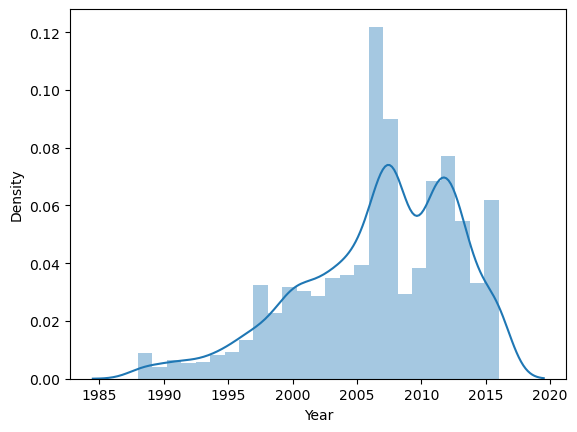

In [25]:
# taking the first percentile
q = data_3["Year"].quantile(0.01)

# Keeping all observations that are higher than the first percentile (1987)
data_4 = data_3[data_3["Year"]>q]

# Checking the new PDF
sns.distplot(data_4["Year"])

### Outlier Treatment for Manufacturing Year Using the 1st Percentile

To handle extreme values in the manufacturing year, a percentile-based approach was used. The 1st percentile of the `Year` column was calculated, and all observations with values below this threshold were removed.

These very early manufacturing years represent a small number of unusually old vehicles that are not representative of the majority of cars in the dataset. Removing them helps reduce noise and ensures the dataset better reflects typical market conditions, thereby improving model reliability.

### Finalizing the Cleaned Dataset

After removing rows with missing values and outliers, the dataset index was reset to ensure a clean and continuous index. A summary of the cleaned data was then generated to review the updated descriptive statistics and confirm that the dataset is consistent and ready for further analysis and modeling.

In [26]:
data_cleaned = data_4.reset_index(drop=True) #removing the old index
data_cleaned.describe(include="all") #Exploring the desc stat of the cleaned data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking OLS Assumptions
OLS assumptions are checked to ensure that the regression model produces reliable, unbiased, and interpretable results. When these assumptions are reasonably satisfied, the estimated coefficients and evaluation metrics can be trusted for inference and prediction.

### Linearity Check

Text(0.5, 1.0, 'Mileage and Price')

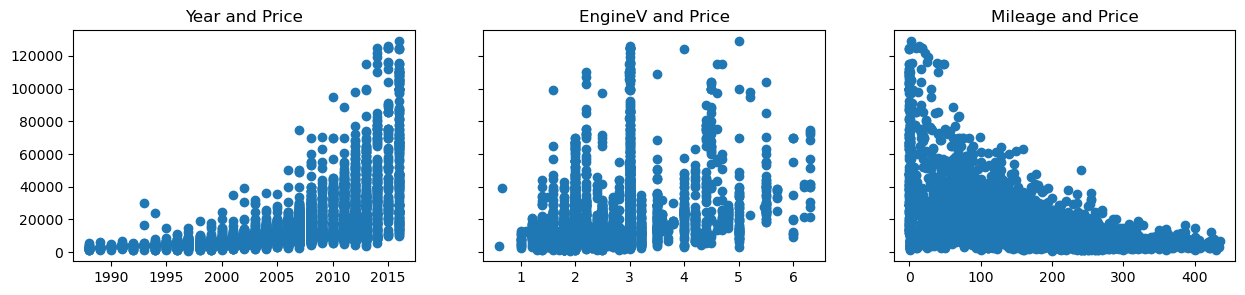

In [27]:
# Checking for linearity using a scatter plot
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax1.set_title("Year and Price")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title("EngineV and Price")
ax3.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax3.set_title("Mileage and Price")

### No Linearity discovered
Beacuse the price variable is not normally distributed, so its relationship with other features is not linear, therefore, a Regression Analysis cannot be run this way. I handled this by normalizing the price data which was done by using the log transformation method

### Relaxing the assumption

In [28]:
## Normalizing the price data column
log_price = np.log(data_cleaned["Price"])

## Adding log_price as a new column on the dataframe
data_cleaned["log_price"] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


### Plotting the data again

Text(0.5, 1.0, 'Mileage and Price')

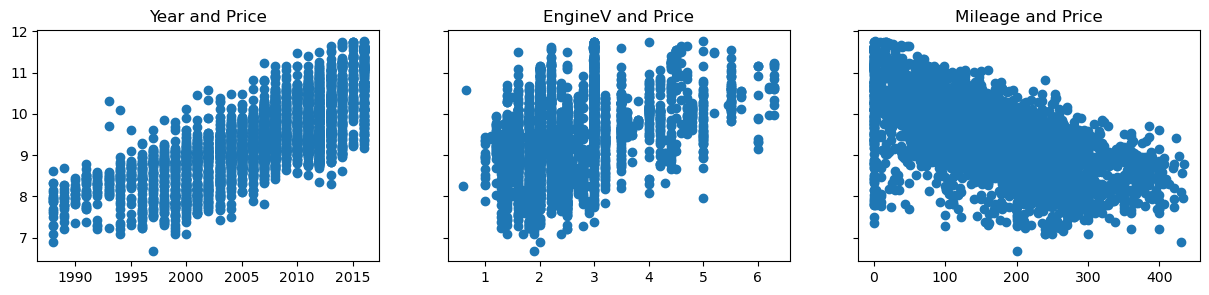

In [29]:
# Normalizing the data for Linearity
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"], data_cleaned["log_price"])
ax1.set_title("Year and Price")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["log_price"])
ax2.set_title("EngineV and Price")
ax3.scatter(data_cleaned["Mileage"], data_cleaned["log_price"])
ax3.set_title("Mileage and Price")

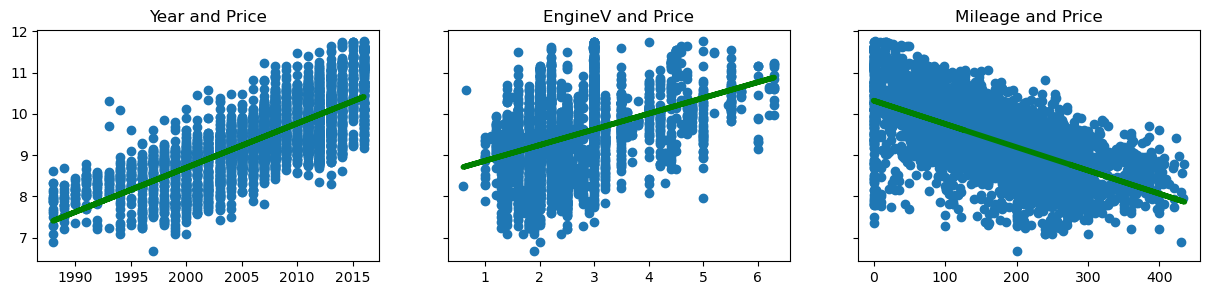

In [32]:
# Normalizing the data for Linearity with visible trendlines
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

# Year vs log_price
ax1.scatter(data_cleaned["Year"], data_cleaned["log_price"])
z1 = np.polyfit(data_cleaned["Year"], data_cleaned["log_price"], 1)
p1 = np.poly1d(z1)
ax1.plot(
    data_cleaned["Year"],
    p1(data_cleaned["Year"]),
    color="green",
    linewidth=4
)
ax1.set_title("Year and Price")

# EngineV vs log_price
ax2.scatter(data_cleaned["EngineV"], data_cleaned["log_price"])
z2 = np.polyfit(data_cleaned["EngineV"], data_cleaned["log_price"], 1)
p2 = np.poly1d(z2)
ax2.plot(
    data_cleaned["EngineV"],
    p2(data_cleaned["EngineV"]),
    color="green",
    linewidth=4
)
ax2.set_title("EngineV and Price")

# Mileage vs log_price
ax3.scatter(data_cleaned["Mileage"], data_cleaned["log_price"])
z3 = np.polyfit(data_cleaned["Mileage"], data_cleaned["log_price"], 1)
p3 = np.poly1d(z3)
ax3.plot(
    data_cleaned["Mileage"],
    p3(data_cleaned["Mileage"]),
    color="green",
    linewidth=4
)
ax3.set_title("Mileage and Price")

plt.show()

### Linearity After Price Normalization

After normalizing the price variable, the relationships between the predictors and the target became more linear and consistent. The trendlines fits the data so much better. The positive relationship between **Year** and price is now clearer, while **Mileage** shows a more stable negative trend. Normalizing the target helps reduce skewness and the influence of extreme values, making the linear patterns more evident and better aligned with the OLS linearity assumption. The original price variable column is then dropped from the dataframe since its no longer needed

In [30]:
# Dropping the price variable column
data_cleaned = data_cleaned.drop(["Price"], axis=1)

### Endogeneity Check

Based on the problem context and the variables used in the model, there is no evidence of endogeneity in the dataset. The explanatory variables are determined independently of the error term and are not influenced by the car price itself. Therefore, the no endogeneity assumption is considered to be reasonably satisfied.

### Autocorrelation Check

The dataset consists of independent observations, with each row representing a different car. There is no natural ordering or time-dependent structure in the data that would cause correlation between error terms. Therefore, the no autocorrelation assumption is not violated

### Multicolinearity  Check  Check Using Variance Inflation Factor (VIF)

Multicollinearity occurs when explanatory variables are highly correlated with each other, which can distort coefficient estimates in an OLS regression model. To assess this, the Variance Inflation Factor (VIF) was calculated for the numerical predictors.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Mileage", "Year", "EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif["Features"] = variables.columns

In [35]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


### VIF Result

The results showed that the `Year` variable had a VIF value greater than 10, indicating a high level of multicollinearity with other predictors. To reduce redundancy and improve model stability, the `Year` feature was removed from the dataset. The remaining variables exhibited acceptable VIF values, suggesting that multicollinearity was sufficiently addressed.

In [36]:
# Removing the year column bcos it is too correlated with other variables
data_no_multicolinearity = data_cleaned.drop(["Year"], axis = 1)

data_no_multicolinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


### Encoding Categorical Variables

Categorical variables were converted into numerical format using dummy variables so they could be included in the regression model. The `get_dummies()` function was used to create binary indicator variables for each category, with one category dropped to avoid the dummy variable trap and reduce multicollinearity.

In [37]:
data_with_dummies = pd.get_dummies(data_no_multicolinearity, drop_first = True)
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,35,1.6,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,9,3.0,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,1,3.5,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


### Reordering Columns

The columns were reordered so that the dependent variable (`log_price`) appears first in the dataset. This improves clarity and consistency, making it easier to separate the target variable from the explanatory variables during model training and interpretation.


In [38]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [39]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [40]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Creating The Regression Model

### Defining the Target and Input Variables

The dependent variable (`log_price`) was separated from the independent variables to clearly define the prediction target and the model inputs. This separation is required for training the regression model.


In [41]:
target = data_preprocessed["log_price"]
inputs = data_preprocessed.drop(["log_price"], axis = 1)

### Feature Scaling

The input features were standardized using `StandardScaler` to ensure that all variables are on a similar scale. Feature scaling helps improve model stability and performance, particularly when predictors have different units or magnitudes.


In [42]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [43]:
inputs_scaled = scaler.transform(inputs)

### Train–Test Split

The dataset was split into training and testing sets to evaluate the model’s performance on unseen data. Eighty percent of the data was used for training, while twenty percent was reserved for testing. A fixed random state was set to ensure reproducibility of the results.


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size = 0.2, random_state =365)

### Model Training and Initial Evaluation

A linear regression model was trained using the training dataset. Predictions were then generated on the training data and compared with the actual target values using a scatter plot. The closer the points lie to the diagonal line, the better the model’s predictions align with the observed values, providing an initial indication of model fit.


In [45]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [46]:
y_hat = reg.predict(x_train)

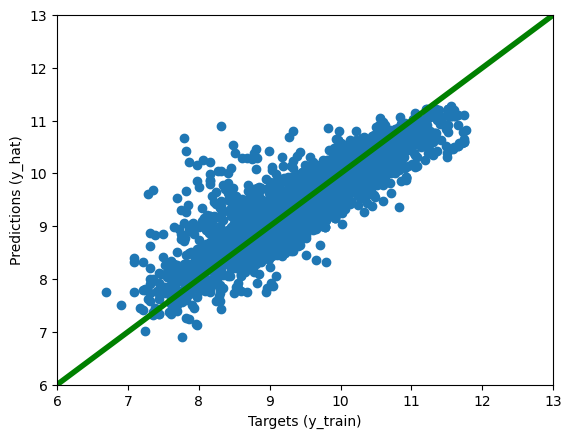

In [49]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)")
plt.ylabel("Predictions (y_hat)")
plt.xlim(6, 13)
plt.ylim(6, 13)

# Line of best fit (perfect prediction line)
plt.plot([6, 13], [6, 13], color='green', linewidth=4)


The scatter plot compares the actual target values with the predicted values from the training data. The strong clustering of points along an upward-sloping diagonal indicates a good fit, showing that the model is able to capture the underlying relationship between the predictors and the target variable.

The green line represents the line of perfect prediction. The closer the points are to this line, the better the model’s predictive performance. The above result is not perfect but its definitely not random

### Residual Analysis

To further validate the model, I examined the distribution of the residuals (the difference between the actual values and the predicted values). The residuals appear approximately normally distributed and centered around zero, which suggests that the model does not suffer from systematic bias and that the normality assumption of OLS is reasonably satisfied.

C:\Users\user\AppData\Local\Temp\ipykernel_13288\673607322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


<Axes: xlabel='log_price', ylabel='Density'>

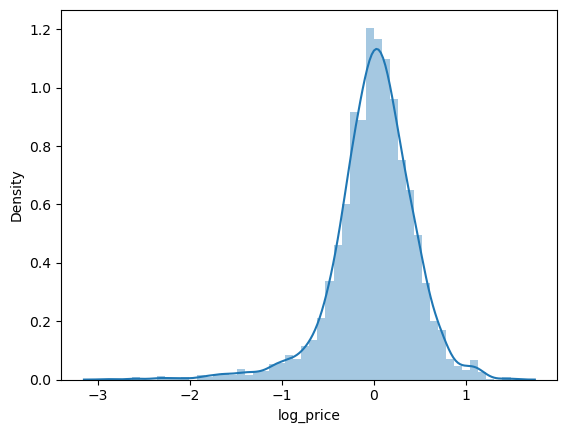

In [50]:
sns.distplot(y_train - y_hat)

### Calculating R-Square
R-squared is calculated to measure how well the independent variables explain the variation in the target variable. It helps assess the overall goodness-of-fit of the regression model.


In [51]:
# Calculate the R Square
reg.score(x_train, y_train)

0.744996578792662

The R-squared value of 0.7449 indicates that approximately 74.5% of the variation in car prices is explained by the variables included in the model. This suggests a strong model fit, as a large portion of the price variability is captured by the predictors.


### Model bias (Intercept)

In [54]:
# Bias
reg.intercept_

9.415239458021297

The bias (intercept) represents the expected value of the target variable when all input features are equal to zero. In this model, the intercept of **9.42** is the baseline log price of a car before accounting for the effects of the explanatory variables.


### Model Weights (Coefficients)

In [55]:
# Weight
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

The weights (coefficients) quantify the relationship between each independent variable and the target variable. Each coefficient shows how much the log of car price is expected to change when the corresponding feature increases by one unit, holding all other variables constant.


### Feature Importance Summary Table
A summary table was created to map each feature to its corresponding coefficient. This makes it easier to interpret the relative impact of each variable on car price.


In [57]:
reg_summary = pd.DataFrame(inputs.columns, columns = ["features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


### Interpretation of key results

#### For Continous Variables :
        **A positive weight shows that as a feature increases in value, so does the log_price and Price respectively while a negative weight shows that as a feature increases in value, the log_price/price decreases

• **Mileage (-0.45)**: Higher mileage significantly reduces car price, confirming that more-used cars tend to be cheaper.

• **Engine Volume (0.21)**: Cars with larger engine volumes tend to have higher prices.


#### For Dummy Variables :
       ** A positive weight shows that the respective category is more expensive than the benchmark while a negative weight means that the repective category is more cheaper than the benchmark or dropped variable
• **Brand Effects**:
  - Premium brands such as **BMW** and **Mercedes-Benz** have positive coefficients, indicating higher prices than the reference brand Audi.
  - Brands like **Renault** and **Mitsubishi** show negative effects, suggesting lower prices compared to the base category (Audi). In other words,  if a car is mitsubishi, it'll be cheaper than an audi and if it is BMW it'll be more expensive than an Audi

• **Body Type**:
  - Body styles such as **sedan, hatch, and van** have negative coefficients, indicating lower prices relative to the reference body type (crossover).

• **Engine Type**:
  - Gas and petrol engines show negative effects compared to the reference engine type (Diesel).

• **Registration Status (0.32)**:
  - Registered cars tend to be more expensive than the ones that have not been registered, reflecting higher perceived value and legal usability.


In [59]:
data_cleaned["Brand"].unique()

#Audi is the dropped variable

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [62]:
data_cleaned["Body"].unique()

#crossover is the dropped variable

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [63]:
data_cleaned["Engine Type"].unique()

#Diesel is the dropped variable

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

## Testing How The Model Performed

In [64]:
y_hat_test = reg.predict(x_test)

After training the model, predictions were generated on the test dataset to evaluate how well the model performs on unseen data.


(6.0, 13.0)

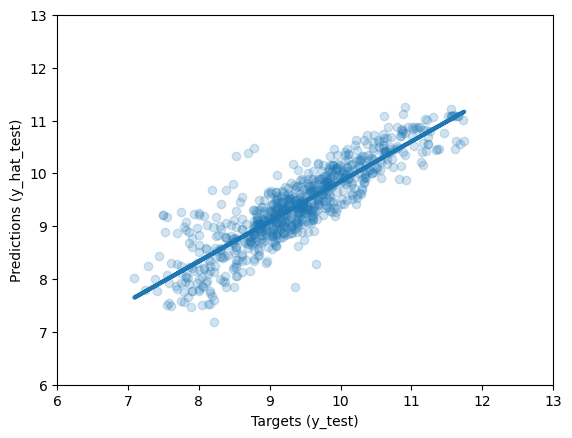

In [66]:
plt.scatter(y_test, y_hat_test, alpha=0.2)

# Line of best fit
z = np.polyfit(y_test, y_hat_test, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), linewidth=3)

plt.xlabel("Targets (y_test)")
plt.ylabel("Predictions (y_hat_test)")
plt.xlim(6, 13)
plt.ylim(6, 13)

This scatter plot compares the actual prices in the test set with the model’s predicted prices. The closer the points lie to the 45-degree line, the better the model’s predictions. The strong upward pattern indicates that the model generalizes well to unseen data, with predictions closely tracking the true values.
Overall, the model seems to be very good at predicting higher prices because of the concentration 


### Generating Test Predictions

In [67]:
# Checking the performance of the predictions to see what the algorithm came up with
df_pf = pd.DataFrame(y_hat_test, columns = ["Prediction"])
df_pf.head()

,Prediction
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


The model’s predictions on the test dataset were stored in a DataFrame to allow for easier inspection and comparison. At this stage, the predicted values are in logarithmic form because the target variable was log-transformed during preprocessing.


### Converting Predictions Back to Original Prices

In [68]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ["Prediction"])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


Since the predictions are expressed in logarithmic scale, the exponential function was applied to convert them back to their original price values. This step makes the results interpretable in real-world monetary terms.


### Comparing Predictions with Actual Values

In [69]:
df_pf["Target"] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


To directly compare the model’s predictions with the actual values, the true test targets were added as a new column alongside the predicted prices. Since the target variable was log-transformed, the exponential function was applied to return the values to their original price scale.


Initially, several missing values appeared in the target column. This occurred because the index of `y_test` did not align with the index of the predictions DataFrame. As a result, pandas matched values based on index labels rather than row order, leading to misalignment.


### Fix: Resetting the Index

In [71]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

To resolve this, the index of `y_test` was reset before assigning it to the DataFrame. This ensured that the actual target values aligned correctly with their corresponding predictions.


In [72]:
df_pf["Target"] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


After fixing the index alignment, predictions and actual prices could be accurately compared row by row, providing a reliable way to assess the model’s performance.


### Evaluating Prediction Errors

In [73]:
df_pf["Residual"] = df_pf["Target"] - df_pf["Prediction"]

To quantify the model’s prediction errors, a residual column was created by calculating the difference between the actual prices and the predicted prices. This shows how far each prediction deviates from the true value.


### Percentage Difference

In [74]:
df_pf["Difference%"] = np.absolute(df_pf["Residual"]/df_pf["Target"]*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


A percentage difference column was added to express the prediction error relative to the actual price. This makes the errors easier to interpret and allows for consistent comparison across cars with different price ranges.

Lower percentage differences indicate more accurate predictions, while higher values highlight cases where the model performs less accurately.


### Descriptive Statistics of Model Performance

Descriptive statistics were computed to evaluate the overall performance of the model across all test observations, focusing on predictions, actual prices, residuals, and percentage errors.


In [75]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


### Interpretation of Results

On average, the model predicts car prices of about **$$15,947**,  while the actual average price in the test set is **$18,166**. This suggests a slight tendency of the model to underpredict higher-priced vehicles.

The median predicted price (**$$11,568**) is very close to the median actual price (**$11,600**), indicating that the model performs particularly well around the center of the price distribution.

The average residual is **$$2,219**, meaning that predictions differ from actual prices by about $2,200 on average. However, the wide standard deviation of residuals (**$10,871**) shows that prediction errors vary significantly across different price ranges.

In percentage terms, the average prediction error is approximately **36.3%**, while the median percentage error is lower at **23.5%**, suggesting that most predictions are reasonably accurate but a few large errors inflate the mean.

The minimum percentage difference is very small (**0.06%**), indicating cases of near-perfect predictions. However, the maximum error reaches **512.7%**, highlighting that the model struggles with some extreme or outlier-priced vehicles.



### Overall Insight

Overall, the model performs well for typical car prices but shows reduced accuracy for very high-priced vehicles, suggesting that additional features or more advanced modeling techniques may further improve performance.
